# MNIST - Shallow Neural Network

In [35]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

In [36]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

Each sample is  28 x 28 px in dimension.

* Train: 60,000 samples
* Valid: 10,000 samples

Load the data into numpy arrays:

In [37]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [38]:
type(X_train)

numpy.ndarray

The `X` arrays contain images of handwritten digits.

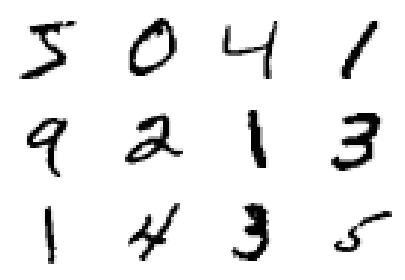

In [39]:
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_train[i], cmap="Greys")
    plt.axis("off")
plt.tight_layout()
plt.show()

The `y` arrays contain labels for the samples contained in `X`.

In [40]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

The simplest way to feed the 28 x 28 images into a neural network is to reshape them to 1D arrays.

In [42]:
X_train = X_train.reshape(60000, 784).astype("float32")
X_valid = X_valid.reshape(10000, 784).astype("float32")

In [43]:
X_train.shape, X_valid.shape

((60000, 784), (10000, 784))

Pixel values are scaled by the max value (255), so that they range from 0 to 1.

In [44]:
X_train = X_train / 255
X_valid = X_valid / 255

Target values are one-hot encoded.

In [45]:
n = 10
y_train = keras.utils.to_categorical(y_train, num_classes=n)
y_valid = keras.utils.to_categorical(y_valid, num_classes=n)

In [46]:
y_train.shape, y_valid.shape

((60000, 10), (10000, 10))

Create a shallow neural network with one hidden layer.

In [47]:
model = Sequential()
model.add(Dense(64, activation="sigmoid", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))

RuntimeError: It looks like you are trying to use a version of multi-backend Keras that does not support TensorFlow 2.0. We recommend using `tf.keras`, or alternatively, downgrading to TensorFlow 1.14.